In [125]:
%matplotlib inline

In [126]:
import matplotlib.pyplot as mp
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import seaborn as sns
import itertools


## Using Pandas to read in and analyse the data
* documentation for pandas is here: https://pandas.pydata.org/
* documentation for reading excel files with pandas is here: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html

In [127]:
### read in the excel file using pandas

data_df = pd.read_excel('BoltGraph.xlsx')

In [128]:
## have a look at the dataframe
data_df

,distance/m,Distnace uncertinty / m,time/s,Time measurment uncertinty / s,Unnamed: 4,Unnamed: 5
0,0,0.02,0.000000,1.00481,NaN,NaN
1,10,0.02,0.923422,0.637569,NaN,NaN
2,20,0.02,2.178145,0.382366,NaN,NaN
3,30,0.02,2.461897,0.911785,NaN,NaN
4,40,0.02,3.387051,0.19851,NaN,NaN
5,50,0.02,5.263879,1.15222,NaN,NaN
6,60,0.02,6.042705,0.161827,NaN,NaN
7,70,0.02,7.939192,0.732011,NaN,NaN
8,80,0.02,8.221779,1.26733,NaN,NaN
9,90,0.02,8.578128,0.590908,NaN,NaN


Looks like we only need the first 10 rows and the first 4 columns of the data. 

Also going to change the column names.

Rereading the data to show how to do this in the initial read

In [129]:
data_df = pd.read_excel('BoltGraph.xlsx', names=('distance', 'err_distance', 'time', 'err_time'), usecols=(0,1,2,3), skipfooter=12)

In [130]:
## Looking at the dataframe again to check it's read in what I want now
data_df

,distance,err_distance,time,err_time
0,0,0.02,0.000000,1.004810
1,10,0.02,0.923422,0.637569
2,20,0.02,2.178145,0.382366
3,30,0.02,2.461897,0.911785
4,40,0.02,3.387051,0.198510
5,50,0.02,5.263879,1.152222
6,60,0.02,6.042705,0.161827
7,70,0.02,7.939192,0.732011
8,80,0.02,8.221779,1.267329
9,90,0.02,8.578128,0.590908


## Making it all pretty

I use a package called seaborn (imported at the top as sns) to make stuff pretty. It has a lot of useful stats things in there too.

This is just setting up the plots to look nice and cycle through some colours so my line colour will iterate

In [131]:
sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.0})
sns.set_palette("hls", 2)

palette = itertools.cycle(sns.color_palette())
col=next(palette)

## Plotting a graph

* Plotting is done with matplotlib.pyplot
* You can call the columns of the dataframe directly by variable name

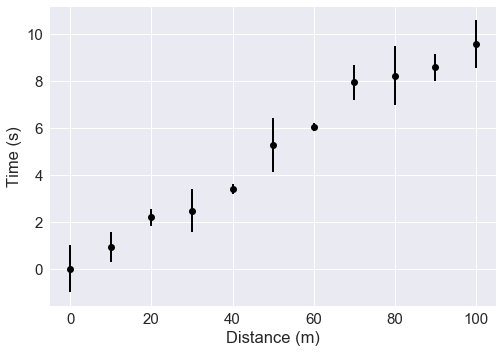

In [132]:
## plot some points with errorbars

mp.errorbar(data_df.distance, data_df.time, yerr=data_df.err_time, fmt='o', color='k')
mp.xlabel('Distance (m)')
mp.ylabel('Time (s)')

## Fitting a line

* Least squares fitting is done with scipy.optimise.curve_fit

First define the function you want to fit:


In [133]:
def line(x, slope, intercept):
    return slope*x + intercept

Then solve for the parameters and the uncertainties

In [134]:
popt, pcov = curve_fit(line,data_df.distance,data_df.time)
slope = popt[0]
intercept = popt[1]
err_slope = np.sqrt(float(pcov[0][0]))
err_intercept = np.sqrt(float(pcov[1][1]))

## Value of the slope and intercept

In [135]:
print('Slope: {0:.3f} +- {1:.3f}'.format(slope, err_slope))

Slope: 0.100 +- 0.005


In [136]:
print('Intercept: {0:.3f} +- {1:.3f}'.format(intercept, err_intercept))

Intercept: -0.048 +- 0.270


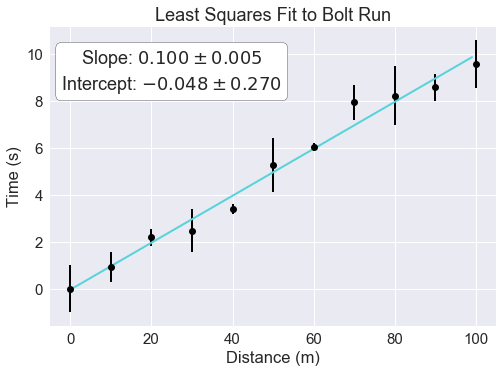

In [137]:
mp.errorbar(data_df.distance, data_df.time, yerr=data_df.err_time, fmt='o', color='k')
x1 = np.arange(0,100)
col=next(palette)
mp.plot(x1, x1*slope+intercept, '-', color=col)
mp.xlabel('Distance (m)')
mp.ylabel('Time (s)')
slope_note = 'Slope: ${0:.3f} \pm {1:.3f}$'.format(slope, err_slope)
intercept_note = 'Intercept: ${0:.3f} \pm {1:.3f}$'.format(intercept, err_intercept)
annotation = slope_note + '\n' + intercept_note
mp.title('Least Squares Fit to Bolt Run')
mp.annotate(annotation, xy=(25,8.5), xycoords='data', ha='center', bbox=dict(boxstyle="round", fc="w"))


## Value of the slope and intercept - weighted fits

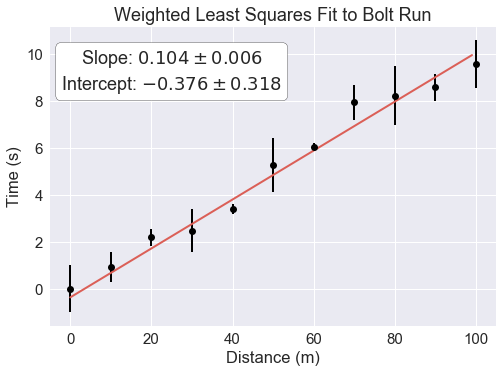

In [138]:
popt, pcov = curve_fit(line,data_df.distance,data_df.time, sigma=data_df.err_time, absolute_sigma=True)
slope_weighted = popt[0]
intercept_weighted = popt[1]
err_slope_weighted = np.sqrt(float(pcov[0][0]))
err_intercept_weighted = np.sqrt(float(pcov[1][1]))

mp.errorbar(data_df.distance, data_df.time, yerr=data_df.err_time, fmt='o', color='k')
x1 = np.arange(0,100)
col=next(palette)
mp.plot(x1, x1*slope_weighted+intercept_weighted, '-', color=col)
mp.xlabel('Distance (m)')
mp.ylabel('Time (s)')

slope_note = 'Slope: ${0:.3f} \pm {1:.3f}$'.format(slope_weighted, err_slope_weighted)
intercept_note = 'Intercept: ${0:.3f} \pm {1:.3f}$'.format(intercept_weighted, err_intercept_weighted)
annotation = slope_note + '\n' + intercept_note
mp.title('Weighted Least Squares Fit to Bolt Run')
mp.annotate(annotation, xy=(25,8.5), xycoords='data', ha='center', bbox=dict(boxstyle="round", fc="w"))



## Plotting it all together

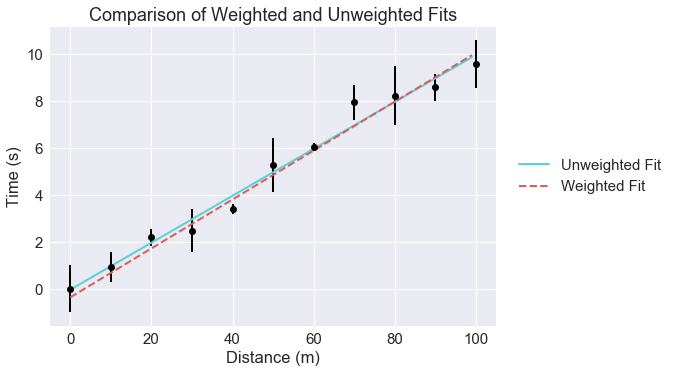

In [139]:
mp.errorbar(data_df.distance, data_df.time, yerr=data_df.err_time, fmt='o', color='k', label='')
x1 = np.arange(0,100)
col=next(palette)
mp.plot(x1, x1*slope+intercept, '-', color=col, label='Unweighted Fit')
col=next(palette)
mp.plot(x1, x1*slope_weighted+intercept_weighted, '--', color=col, label='Weighted Fit')

mp.xlabel('Distance (m)')
mp.ylabel('Time (s)')

mp.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
mp.title('Comparison of Weighted and Unweighted Fits')


## Comparison to values in the original spreadsheet

* I'm assuming the values for slope and intercept in the original spreadsheet are inverse values, so I've just done a simple test


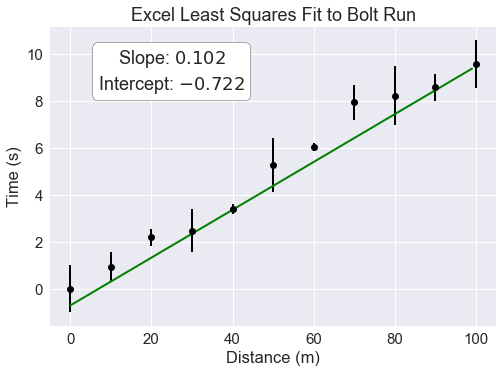

In [141]:
slope_ps = 9.801495
intercept_ps = 1.385408
col='g'
mp.errorbar(data_df.distance, data_df.time, yerr=data_df.err_time, fmt='o', color='k')
x1 = np.arange(0,100)
mp.plot(x1, +(x1/slope_ps+1./(-intercept_ps)), '-', color=col)
mp.xlabel('Distance (m)')
mp.ylabel('Time (s)')
slope_note = 'Slope: ${0:.3f}$'.format(1./slope_ps,)
intercept_note = 'Intercept: ${0:.3f}$'.format(-1./intercept_ps)
annotation = slope_note + '\n' + intercept_note
mp.title('Excel Least Squares Fit to Bolt Run')
mp.annotate(annotation, xy=(25,8.5), xycoords='data', ha='center', bbox=dict(boxstyle="round", fc="w"))